# Symmetries in closed and open quantum systems

### Symmetries in Hamiltonian Systems

In quantum systems, a **symmetry** corresponds to a transformation under which the system remains invariant. If the Hamiltonian $ \hat{H} $ commutes with a symmetry operator $ \hat{S} $:

$$
[\hat{H}, \hat{S}] = 0
$$

then the observable associated with $ \hat{S} $ is conserved over time. According to **Noether's theorem**, symmetries lead to conservation laws. For example, $U(1)$ symmetry often corresponds to the conservation of particle number or charge.


### Example: Jaynes-Cummings Model

The **Jaynes-Cummings model** describes the interaction between a two-level atom and a single quantized electromagnetic field mode. Its Hamiltonian is:

$$
\hat{H}_{JC} = \hbar \omega \hat{a}^\dagger \hat{a} + \frac{\hbar \omega_0}{2} \hat{\sigma}_z + \hbar g (\hat{a}^\dagger \hat{\sigma}_- + \hat{a} \hat{\sigma}_+)
$$

Here, $ \hat{a}^\dagger $ and $ \hat{a} $ are the creation/annihilation operators for the field, and $ \hat{\sigma}_z, \hat{\sigma}_\pm $ are Pauli operators for the atom.

This model has $U(1)$ symmetry, meaning the total number of excitations:

$$
\hat{N} = \hat{a}^\dagger \hat{a} + \hat{\sigma}_+ \hat{\sigma}_-
$$

is conserved, as:

$$
[\hat{H}_{JC}, \hat{N}] = 0
$$

Thus, the total number of particles (photons + atomic excitations) is constant.

In [28]:
using QuantumToolbox
using CairoMakie

In [3]:
const N = 10 # cutoff for the Fock space of the cavity

const a = tensor(destroy(N), qeye(2)) # cavity annihilation operator

const σm = tensor(qeye(N), sigmam()) # atomic lowering operator
const σp = tensor(qeye(N), sigmap()) # atomic raising operator
const σz = tensor(qeye(N), sigmaz()) # atomic z operator

function H(ωc, ωq, g)
    return ωc * a' * a + ωq * σz / 2 + g * (a' * σm + a * σp)
end

H (generic function with 1 method)

Let's define the operator $\hat{\Pi} = \exp \left( i \pi \hat{N} \right) $, and let's calculate the commutator $[\hat{H}_{JC}, \hat{\Pi}]$ to verify that the Hamiltonian commutes with the parity operator.

In [4]:
ωc = 1
ωq = 1
g = 0.01

Π = exp(1im * π * (a' * a + σp * σm))
H_JC = H(ωc, ωq, g)


Quantum Object:   type=Operator   dims=[10, 2]   size=(20, 20)   ishermitian=true
20×20 SparseMatrixCSC{ComplexF64, Int64} with 38 stored entries:
⎡⡑⢌⠠⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠂⡑⢌⠠⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠂⡑⢌⠠⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠂⡑⢌⠠⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠂⡑⢌⎦

In [5]:
norm(commutator(H_JC, Π))

2.3264576987640928e-15

Was is just a coincidence? Let's try calculate it for different values of $\theta$.

In [26]:
function Π_θ(θ)
    return exp(1im * θ * (a' * a + σp * σm))
end

θ_list = range(0, 2π, 101) # 101 elements from 0 to 2π, in order to include also π
norm_list = map(θ -> norm(commutator(H_JC, Π_θ(θ))), θ_list)

all(isapprox.(norm_list, 0, atol=1e-10))

true

Let's try with the Quantum Rabi Model now

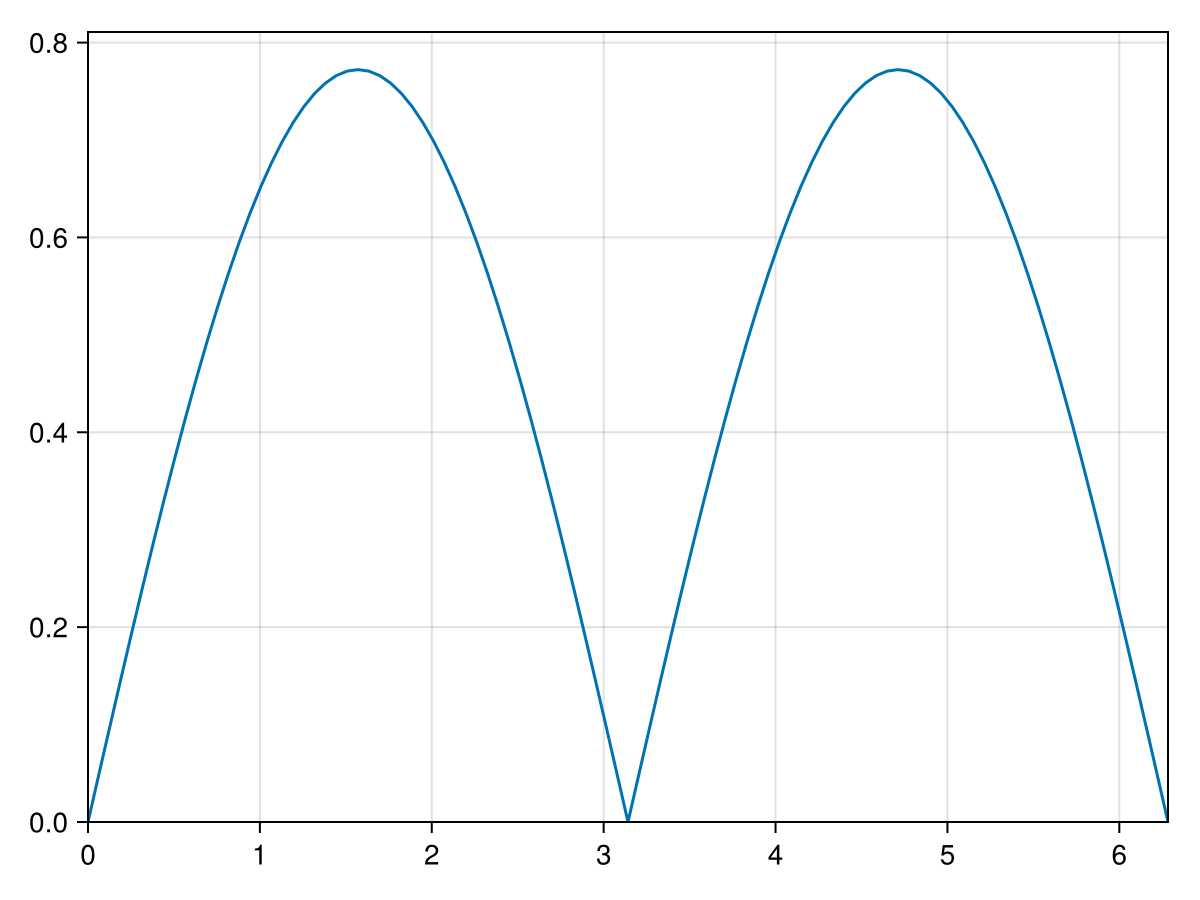

In [31]:
H_QRM = ωc * a' * a + ωq * σz / 2 + g * (a + a') * (σm + σp)

norm_list = map(θ -> norm(commutator(H_QRM, Π_θ(θ))), θ_list)

fig = Figure()
ax = Axis(fig[1, 1])

lines!(ax, θ_list, norm_list)
xlims!(ax, 0, 2π)
ylims!(ax, 0, nothing)

fig

As can be seen, the parity is conserved only for discrete values of $\theta$: $\theta = 0, \pi$.

## Exercise

We now know that there is a symmetry in our system, and that we can block-diagonalize the Hamiltonian. In the JC model, each block corresponds to a different number of excitations. In the Rabi model, the blocks correspond to different values of the parity: even and odd.

Find a way to block-diagonalize the Hamiltonian.

> **Hint:** Choose a starting vector (e.g., $|\Psi_0 \rangle = |0, e\rangle$) and check all the connected vectors through the Hamiltonian such that $\langle \Psi_i | \hat{H} | \Psi_0 \rangle \neq 0$. These vectors will form a block. Repeat the process for the remaining vectors.